Class
1    102
0     63
dtype: int64


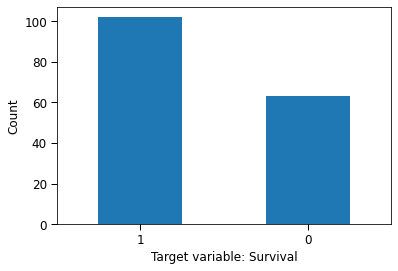

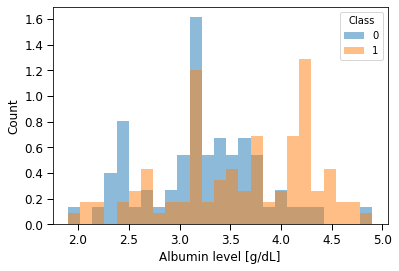

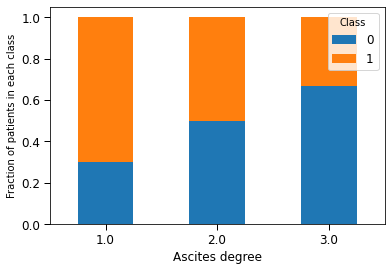

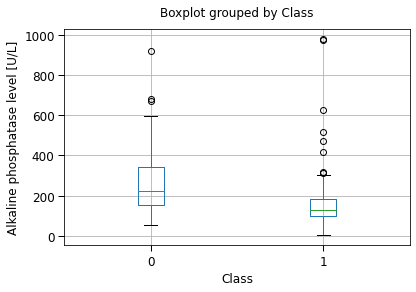

In [36]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
import ssl
import urllib

col_names=['Gender','Symptoms','Alcohol','Hep_b_surf_antigen','Hep_b_e_antigen','Hep_b_core_antibody',\
           'Hep_c_vir_antibody','Cirrhosis','Endemic_countries','Smoking','Diabetes','Obesity','Hemochromatosis',\
           'Arterial_hypertension','Chronic_ren_insufficiency','HIV','Nonalcoholic_steatohepatitis',\
           'Esophageal_varices','Splenomegaly','Portal_hypertension','Portal_vein_thrombosis','Liver_metastasis','Radiological_hallmark',\
           'Age','Grams_alc_per_day','Packs_cigarettes_per_year','Performance_status','Encefalopathy_degree',\
           'Ascites_degree','International_norm_ratio','Alpha-Fetoprotein','Hemoglobin','Mean_corp_volume',\
           'Leukocytes','Platelets','Albumin','Total_bilirubin','Alanine_transaminase','Aspartate_transaminase',\
           'Gamma_glutamyl_transferase','Alkaline_phosphatase','Total_proteins','Creatinine','Nodule_num',\
           'Nodule_dim','Direct_bilirubin','Iron','Oxygen_saturation','Ferritin','Class']
df=pd.read_table('hcc-data.txt',sep=',',header=None,names=col_names,na_values="?")
# print(df.dtypes)
# print(df.isnull().sum(axis=0))

# for column in df.columns:
#     print(df.value_counts(column))

# cat_ftrs1=['Gender','Symptoms','Alcohol','Hep_b_surf_antigen','Hep_b_e_antigen','Hep_b_core_antibody',\
#           'Hep_c_vir_antibody','Cirrhosis']
# cat_ftrs2=['Endemic_countries','Smoking','Diabetes','Obesity','Hemochromatosis','Arterial_hypertension',\
#            'Chronic_ren_insufficiency']
# cat_ftrs3=['HIV','Nonalcoholic_steatohepatitis','Esophageal_varices','Splenomegaly','Portal_hypertension']
# cat_ftrs4=['Portal_vein_thrombosis','Liver_metastasis','Radiological_hallmark','Performance_status',\
#            'Encefalopathy_degree','Ascites_degree']

# cont_ftrs1=['Age','Grams_alc_per_day','Packs_cigarettes_per_year']
# cont_ftrs2=[International_norm_ratio','Alpha-Fetoprotein','Hemoglobin','Mean_corp_volume']
# cont_ftrs3=['Leukocytes','Platelets','Albumin','Total_bilirubin','Alanine_transaminase','Aspartate_transaminase']
# cont_ftrs4=['Gamma_glutamyl_transferase','Alkaline_phosphatase','Total_proteins','Creatinine','Nodule_num']
# cont_ftrs5=['Nodule_dim','Direct_bilirubin','Iron','Oxygen_saturation','Ferritin']

# cont_ftrs_list=[cont_ftrs1, cont_ftrs2, cont_ftrs3, cont_ftrs4, cont_ftrs5]
# for l in cont_ftrs_list:
#     pd.plotting.scatter_matrix(df[l], figsize=(9, 9), marker='o',hist_kwds={'bins': 20}, 
#                            s=30, alpha=.3)
#     plt.show()
# for ftr in ['cont_ftrs5']:
#     df[['Class',ftr]].boxplot(by='Class')
#     plt.ylabel(ftr)
#     plt.xlabel('Class')
#     plt.show()

fig = plt.figure()
axis1 = fig.add_subplot(1)
>>> axis1.plot(range(10))
>>> axis2 = fig.add_subplot(212)
>>> axis2.plot(range(10,20))
>>> fig.savefig('multipleplots.png')


print(df.value_counts('Class'))
pd.value_counts(df['Class']).plot.bar()
plt.xlabel('Target variable: Survival',fontsize='large')
plt.ylabel('Count',fontsize='large')
plt.xticks(rotation=0)
plt.tick_params(axis='both', which='major', labelsize=12, width=1, length=6)
plt.show()

bin_range = (df['Albumin'].min(),df['Albumin'].max())
for c in [0,1]:
    plt.hist(df[df['Class']==c]['Albumin'],alpha=0.5,label=c,range=bin_range,bins=25,density=True)
plt.legend(title='Class')
plt.ylabel('Count',fontsize='large')
plt.xlabel('Albumin level [g/dL]',fontsize='large')
plt.tick_params(axis='both', which='major', labelsize=12, width=1, length=6)
plt.show()

count_matrix = df.groupby(['Ascites_degree','Class']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('Fraction of patients in each class')
plt.xlabel('Ascites degree',fontsize='large')
plt.legend(title='Class',fontsize='large')
plt.xticks(rotation=0)
plt.tick_params(axis='both', which='major', labelsize=12, width=1, length=6)
plt.show()

df[['Class','Alkaline_phosphatase']].boxplot(by='Class')
plt.ylabel('Alkaline phosphatase level [U/L]',fontsize='large')
plt.xlabel('Class',fontsize='large')
plt.tick_params(axis='both', which='major', labelsize=12, width=1, length=6)
plt.title('')
plt.show()


Fraction of features with missing values:  0.898
Fraction of data points with missing values:  0.9515
Fraction of data points with missing values for a continuous feature:  0.8364
Average fraction of missing values per feature:  0.10216450216450217


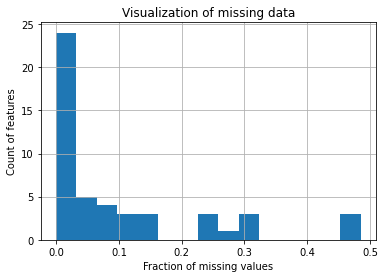

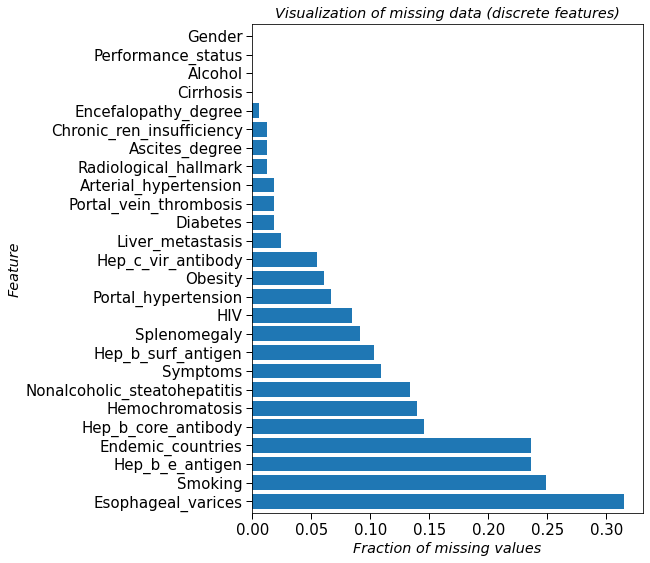

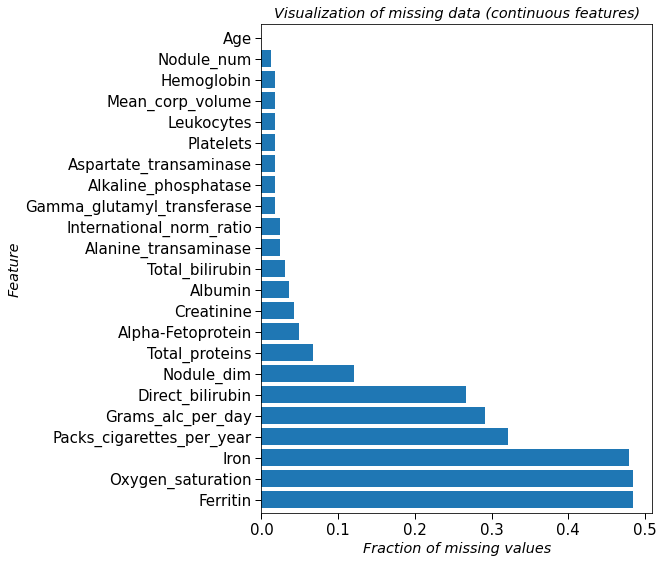

In [3]:
cat_ftrs=['Gender','Symptoms','Alcohol','Hep_b_surf_antigen','Hep_b_e_antigen','Hep_b_core_antibody',\
          'Hep_c_vir_antibody','Cirrhosis','Endemic_countries','Smoking','Diabetes','Obesity','Hemochromatosis',\
          'Arterial_hypertension','Chronic_ren_insufficiency','HIV','Nonalcoholic_steatohepatitis',\
          'Esophageal_varices','Splenomegaly','Portal_hypertension','Portal_vein_thrombosis','Liver_metastasis','Radiological_hallmark']
ord_ftrs=['Performance_status','Encefalopathy_degree','Ascites_degree']
std_ftrs=['Age','Grams_alc_per_day','Packs_cigarettes_per_year','International_norm_ratio','Alpha-Fetoprotein',\
          'Hemoglobin','Mean_corp_volume','Leukocytes','Platelets','Albumin','Total_bilirubin','Alanine_transaminase',\
          'Aspartate_transaminase','Gamma_glutamyl_transferase','Alkaline_phosphatase','Total_proteins','Creatinine',\
          'Nodule_num','Nodule_dim','Direct_bilirubin','Iron','Oxygen_saturation','Ferritin']
y=df['Class']
X=df.loc[:, df.columns != 'Class']
rs=1

#Missing values
perc_missing_per_ftr = X.isnull().sum(axis=0)/X.shape[0]
missing_sorted=perc_missing_per_ftr.sort_values(ascending = True)
print('Fraction of features with missing values: ',np.around(sum(X.isnull().sum(axis=0)!=0)/X.shape[1],4))
print('Fraction of data points with missing values: ',np.around(sum(X.isnull().sum(axis=1)!=0)/X.shape[0],4))
print('Fraction of data points with missing values for a continuous feature: ',np.around(sum(X[std_ftrs].isnull().sum(axis=1)!=0)/X[std_ftrs].shape[0],4))
print('Average fraction of missing values per feature: ',np.mean(perc_missing_per_ftr))
# print('fraction of missing values in features:')
# print(missing_sorted)
# pd.set_option('display.max_rows', None)
# print(df[['Total_bilirubin','Direct_bilirubin']].isnull())

missing_sorted.hist(bins=15)
plt.xlabel('Fraction of missing values')
plt.ylabel('Count of features')
plt.title('Visualization of missing data')
plt.show()

plt.figure(figsize=(7,9))
(X[cat_ftrs+ord_ftrs].isnull().sum(axis=0)/X[cat_ftrs+ord_ftrs].shape[0]).sort_values(ascending=False).plot.barh(width=.8)
plt.xlabel('Fraction of missing values',fontsize='x-large',fontstyle='oblique')
plt.ylabel('Feature',fontsize='x-large',fontstyle='oblique')
plt.title('Visualization of missing data (discrete features)',fontsize='x-large',fontstyle='oblique')
plt.tick_params(axis='both', which='major', labelsize=15, width=1, length=6)
plt.show()

plt.figure(figsize=(7,9))
(X[std_ftrs].isnull().sum(axis=0)/X[std_ftrs].shape[0]).sort_values(ascending=False).plot.barh(width=.8)
plt.xlabel('Fraction of missing values',fontsize='x-large',fontstyle='oblique')
plt.ylabel('Feature',fontsize='x-large',fontstyle='oblique')
plt.title('Visualization of missing data (continuous features)',fontsize='x-large',fontstyle='oblique')
plt.tick_params(axis='both', which='major', labelsize=15, width=1, length=6)
plt.show()


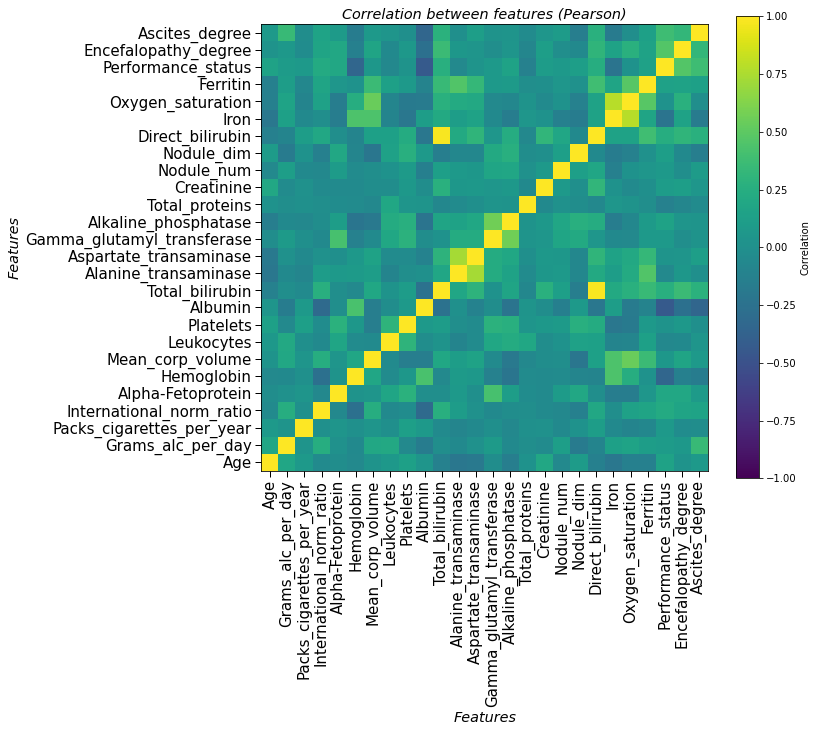

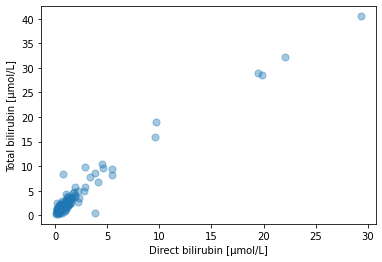

In [12]:
corr_df=X[std_ftrs+ord_ftrs].corr(method='pearson')
# print(corr_df)
plt.figure(figsize=(10,10))
plt.imshow(corr_df, origin='lower',vmin=-1) 
plt.xlabel('Features',fontsize='x-large',fontstyle='oblique')
plt.ylabel('Features',fontsize='x-large',fontstyle='oblique')
plt.tick_params(axis='both',labelsize=15, width=1, length=6)
plt.xticks(np.arange(0, len(X[std_ftrs+ord_ftrs].columns),1),X[std_ftrs+ord_ftrs].columns,rotation=90)
plt.yticks(np.arange(0, len(X[std_ftrs+ord_ftrs].columns),1),X[std_ftrs+ord_ftrs].columns)
#plt.clim(-1,1)
plt.colorbar(label='Correlation',shrink=.85)
plt.title('Correlation between features (Pearson)',fontsize='x-large',fontstyle='oblique')
plt.show()
df.plot.scatter('Direct_bilirubin','Total_bilirubin',s=50,alpha=0.4)
plt.xlabel('Direct bilirubin [µmol/L]')
plt.ylabel('Total bilirubin [µmol/L]')
plt.show()

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.feature_selection import f_regression, mutual_info_classif

#Splitting and preprocessing

X['Performance_status']=X['Performance_status']+1  #0 will represent missing values for ordinal features
# X.drop('Direct_bilirubin',axis=1)
for cat in cat_ftrs:
    X[cat] = X[cat].replace([1,0],['Yes','No'])
    X[cat].astype(str)

X_test,X_other,y_test,y_other=train_test_split(X,y,train_size=.2,random_state=rs,shuffle=True)
onehot_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='Unknown')),
    ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore',drop='if_binary'))])
ord_transformer = Pipeline(steps=[
    ('imputer2', SimpleImputer(strategy='constant',fill_value=0))])

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ord_transformer, ord_ftrs),
        ('onehot', onehot_transformer, cat_ftrs),
        ('std', StandardScaler(), std_ftrs)],
    remainder='passthrough',verbose_feature_names_out=False)

clf = Pipeline(steps=[('preprocessor', preprocessor)])
enc=OneHotEncoder(sparse=False, handle_unknown="ignore",drop='if_binary')

# print('x_test: ',X_test.shape)

kf = KFold(n_splits=5,shuffle=True,random_state=rs)
for train_index, val_index in kf.split(X_other,y_other):
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
#     print("x_train:",X_train.shape)
#     print("x_val:",X_val.shape)
    enc.fit(X_train[cat_ftrs])
    onehot_ftrs=list(enc.get_feature_names_out(cat_ftrs))
    X_train_prep=pd.DataFrame(clf.fit_transform(X_train),columns=ord_ftrs+onehot_ftrs+std_ftrs)
    X_val_prep=pd.DataFrame(clf.transform(X_val),columns=ord_ftrs+onehot_ftrs+std_ftrs)
#     print("x_train_prep:",X_train_prep.shape)
#     print("x_val_prep:",X_val_prep.shape)
#     print('y_val: ',y_val.value_counts('Class'))
#     print('y_train: ',y_train.value_counts('Class'))
#     #Non-linear correlation = MI
#     mi=mutual_info_classif(X_train_prep[ord_ftrs+onehot_ftrs], y_train, copy=True, random_state=rs)
#     mi_df=pd.DataFrame({'mi':mi,'features':ord_ftrs+onehot_ftrs})
#     mi_sorted=mi_df.sort_values(by='mi',ascending=False)
#     mi_sorted.iloc[:5].plot.bar('features','mi')
#     plt.title('Figure 2')
#     plt.ylabel('Non-linear Correlation')
#     plt.xlabel('Feature')
#     plt.show()
    

X_test_prep=pd.DataFrame(clf.transform(X_test),columns=ord_ftrs+onehot_ftrs+std_ftrs)
# print('x_test_prep',X_test_prep.shape)




C:\Users\jcl98\AppData\Local\Temp\ipykernel_16008\2559820386.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Performance_status']=X['Performance_status']+1  #0 will represent missing values for ordinal features
C:\Users\jcl98\AppData\Local\Temp\ipykernel_16008\2559820386.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cat] = X[cat].replace([1,0],['Yes','No'])


(33, 49)
x_train: (105, 49)
x_val: (27, 49)
x_train_prep: (105, 89)
x_val_prep: (27, 89)
x_train: (105, 49)
x_val: (27, 49)
x_train_prep: (105, 87)
x_val_prep: (27, 87)
x_train: (106, 49)
x_val: (26, 49)
x_train_prep: (106, 89)
x_val_prep: (26, 89)
x_train: (106, 49)
x_val: (26, 49)
x_train_prep: (106, 89)
x_val_prep: (26, 89)
x_train: (106, 49)
x_val: (26, 49)
x_train_prep: (106, 89)
x_val_prep: (26, 89)
x_test_prep (33, 89)


C:\Users\jcl98\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
